### **HR ANALYTICS: JOB CHANGE PREDICTION**

> Il dataset preso in esame per il seguente project work è scaricabile e riutilizzabile per ulteriori migliorie dalla piattaforma online Kaggle, al seguente [[ link ].](https://www.kaggle.com/bayunova/hr-changing-jobs-of-employee/data)






 **Problem statement**

Un'azienda attiva nell'ambito dei Big Data e della Data Science vuole assumere data scientist che hanno superato con successo la formazione condotta dalla stessa azienda. Per una ottimizzazione dei costi e dei tempi, nonchè della qualità della pianificazione della formazione e della categorizzazione dei canditati, l'azienda vuole comprendere chi è davvero interessato a proseguire il proprio percorso lavorativo in azienda.

***Obiettivo***: *prevedere, attraverso tecniche di apprendimento automatico, la probabilità che un candidato cerchi un nuovo lavoro o continui a lavorare per l'azienda.*

**Content**


*   *Importing Libreries*
*   *Importing Data*
*   *Data Overview*
*   *EDA (Exploratory Data Analysis)*
*   *Data Prepocessing* 
*   *Modeling*
*   *Conclusion*
*   *Pipeline*



**Importing Libreries**


> Inizialmente è necessario importare le principali librerie da utilizzare nel corso del project work. Esse sono state suddivise in base alla fase di analisi di riferimento. 

In [1]:
#importing data 
import pandas as pd

#data overview + EDA
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.express as px 

#preprocessing 
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler 

#modeling 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from pandas.plotting import scatter_matrix

#pipeline 
from sklearn.pipeline import Pipeline


from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

**Importing Data**


>  Si importano i dati di x_train e y_train utilizzando la funzione ***read_csv*** della libreria pandas.

In [2]:
x_train_data = pd.read_csv('/content/X_train.csv')
y_train_data = pd.read_csv('/content/y_train.csv')

**Data Overview**


> Si effettua una panoramica dei dati importati attraverso la funzione ***sample*** incorporata nel modulo random che restituisce una lista di elementi scelti dal set di dati. Successivamente si procede alla descrizione delle ***features*** presenti, all'analisi della ***dimensione*** del dataset e all'unione delle due tabelle attraverso la funzione ***concat*** della libreria pandas.




In [3]:
print(x_train_data.sample(5))
print('\n')
print(y_train_data.sample(5))

       enrollee_id      city  ...  last_new_job training_hours
6084          2180   city_21  ...             1             50
11800        29725   city_40  ...            >4             47
6669         15523   city_16  ...             2             92
7238         14399  city_103  ...            >4             14
469          13688   city_21  ...           NaN             45

[5 rows x 13 columns]


      enrollee_id  target
3275        23404     0.0
6580        30227     0.0
4917         6828     1.0
9447        11253     0.0
3568         7635     0.0


***Features***: 

*  *enrollee_id* : ID unico per il candidato
*  *city* : Codice città del candidato
*  *city_ development_index* : Indice di sviluppo della città
*  *gender*: Sesso del candidato
*  *relevent_experience* : Esperienza pregressa del candidato
*  *enrolled_university* : Corso universitario a cui il candidato è iscritto (se presente)
*  *education_level* : Livello di istruzione del candidato  
*  *major_discipline* : Disciplina principale del candidato 
*  *experience* : Esperienza pregressa del candidato in anni
*  *company_size* : Numero dipendenti nell'azienda attuale 
*  *company_type* : Tipo di azienda attuale
*  *lastnewjob* : Differenza in anni tra lavoro precedente ed attuale
*  *training_hours* : Ore di formazione completate
*  *target* : 0 – Non in cerca di lavoro, 1 – In cerca di lavoro







***Dataset size:***



In [4]:
print('X_train shape:'+ ' ' + str(x_train_data.shape))
print('Y_train shape:'+ ' ' + str(y_train_data.shape))

X_train shape: (12452, 13)
Y_train shape: (12452, 2)


***Dataset union:***

In [5]:
join = (x_train_data, y_train_data['target'])
df = pd.concat(join, axis = True)
print(df.head())
print('\n')
print('Dataset shape:' + ' ' + str(df.shape))


   enrollee_id      city  ...  training_hours target
0        25298  city_138  ...              45    0.0
1         4241  city_160  ...              17    1.0
2        24086   city_57  ...              50    0.0
3        26773   city_16  ...             135    0.0
4        32325  city_143  ...              17    1.0

[5 rows x 14 columns]


Dataset shape: (12452, 14)


> Dal dataset congiunto, ottenuto attraverso la funzione ***concat*** della libreria pandas, si sono chiamate sull'intero set di dati la funzione di lettura ***head*** che ritorna di default le prime 5 righe del dataset e la funzione ***shape***. L'output restituito si compone di 12452 osservazioni (righe) e 14 caratteristiche (colonne).

Per una visualizzazione più chiara, si procede alla modifica delle etichette degli assi attraverso la funzione *** rename***. Inoltre, con la funzione ***set_index*** si setta la colonna 'Enrollee_id', comune ad entrambi i dataset, come indice dell'intero set di dati. 

In [6]:
df.rename(columns= {"city": "City", "city_development_index":"City_development_index", "enrollee_id": "Enrollee_id", "gender": "Gender", "relevent_experience" : "Relevent_experience", "enrolled_university":"University_enrollment", "major_discipline": "Discipline", "education_level": "Education_level", "experience": "Experience", "company_size": "Company_size", "company_type":"Company_type", "last_new_job":"Last_job", "training_hours":"Training_hours"}, inplace=True)
df = df.set_index('Enrollee_id')

**EDA (Exploratory Data Analysis)** 

> L' analisi esplorativa dei dati si riferisce ad un vero e proprio processo di esecuzione di indagini iniziali sui dati per raccogliere (estrapolare) il maggior numero possibile di informazioni da essi.



In pandas la funzione ***describe*** permette di ottenere varie statistiche di riepilogo, quali il conteggio, la media, la deviazione standard, i valori minimo e massimo ed i quantili dei dati. La funzione ***info***, invece, consente di visualizzare non solo i tipi di dati ma anche la presenza o meno di valori null.


In [7]:
print(df.describe())
print("\n")
print(df.info())

       City_development_index  Training_hours        target
count            12452.000000    12452.000000  12452.000000
mean                 0.829709       65.604481      0.249358
std                  0.123087       60.430340      0.432659
min                  0.448000        1.000000      0.000000
25%                  0.740000       23.000000      0.000000
50%                  0.910000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12452 entries, 25298 to 31875
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    12452 non-null  object 
 1   City_development_index  12452 non-null  float64
 2   Gender                  9535 non-null   object 
 3   Relevent_experience     12452 non-null  object 
 4   University_enrollment 

> Dall'output si può evincere che:
 *   i dati presentano maggiormente valori float64, int64 e object 
 *   la maggior parte dei dati sono categorici 
 *   alcune variabili presentano valori nulli



***Founding missing values:***

La funzione ***isnull().sum*** consente di varificare per ogni colonna e riga la presenza o meno di valori NaN/None e il loro conteggio. Per calcolare la percentuale dei valori mancanti per ogni colonna si moltiplica il valore NaN per 100 e lo si divide per la dimensione dell'elemento di riferimento.

In [8]:
missing_data = pd.DataFrame(
                    {'Missing_data': df.isnull().sum(axis=0),
                     '%_Missing_data': df.isnull().sum(axis=0)*100/df.shape[0]
                     })
print(missing_data)

                        Missing_data  %_Missing_data
City                               0        0.000000
City_development_index             0        0.000000
Gender                          2917       23.425956
Relevent_experience                0        0.000000
University_enrollment            257        2.063925
Education_level                  315        2.529714
Discipline                      1866       14.985544
Experience                        37        0.297141
Company_size                    3852       30.934790
Company_type                    3981       31.970768
Last_job                         273        2.192419
Training_hours                     0        0.000000
target                             0        0.000000


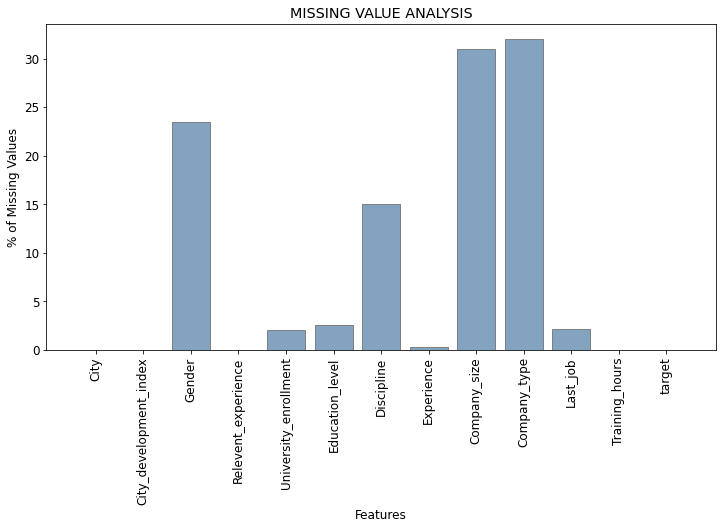

In [9]:
plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)
plt.title("MISSING VALUE ANALYSIS")
plt.xlabel("Features")
plt.ylabel("% of Missing Values")
plt.bar(df.columns, missing_data["%_Missing_data"],color= (0.2, 0.4, 0.6, 0.6),edgecolor='grey');

***Founding duplicated values:***

La funzione ***duplicated*** permette di verificare la presenza di righe duplicate. Settando il parametro *keep* a *False* si marcano tutti i duplicati a *True*. Con la funzione ***value_counts*** è possibile visualizzare i corrispettivi conteggi.

In [10]:
duplicated_data = df.duplicated(keep=False)
print(duplicated_data.value_counts())

False    12408
True        44
dtype: int64


***Founding unique values:***

La funzione ***nunique*** ritorna il numero di elementi distinti nell'asse specificato.

In [11]:
unique_values = df.nunique()
print(unique_values)

City                      122
City_development_index     92
Gender                      3
Relevent_experience         2
University_enrollment       3
Education_level             5
Discipline                  6
Experience                 22
Company_size                8
Company_type                6
Last_job                    6
Training_hours            241
target                      2
dtype: int64


***Founding outlier values:***

In prima istanza si definisce la funzione ***get_df_numerical*** la quale, una volta chiamata, ritorna solo le colonne del dataset con valori di tipo numerico. I *numerics* (int64 e float64) sono passati come parametri della funzione definita. 
In seconda istanza si parte dal dataset *df2*, risultante dalla funzione richiamata, per cercare possibili valori outliers. Essi possono essere visualizzati graficamente attraverso il *bloxplot*, un diagramma a scatola (o diagramma a scatola e baffi) che mostra la distribuzione dei dati quantitativi in base ai valori di minimo, primo quartile, mediano, terzo quartile e massimo. Gli outlier sono da identificare o al di sopra del terzo quartile o al di sotto del primo quartile. Per verificare la distribuzione dei valori di City_development_index e Training_hours nell'intero dataset si effettua il conteggio delle features con il possibile valore di outliers. 

In [12]:
def get_df_numerical(df, numerics = ['int64', 'float64']):
    return df.select_dtypes(include=numerics)
df2 = get_df_numerical(df)
df2.head()

,City_development_index,Training_hours,target
Enrollee_id,,,
25298,0.836,45,0.0
4241,0.920,17,1.0
24086,0.866,50,0.0
26773,0.910,135,0.0
32325,0.740,17,1.0


CITY_DEVELOPMENT_INDEX


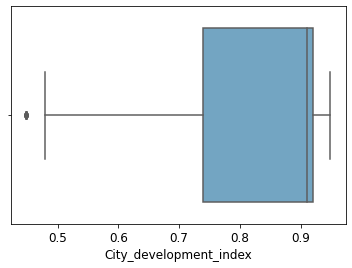

TRAINING_HOURS


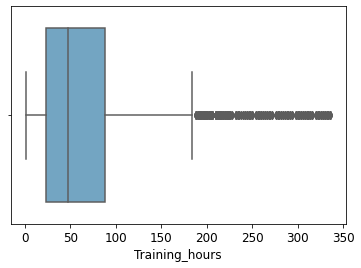

In [13]:
for i in ["City_development_index", "Training_hours"]:
    print(i.upper())
    sns.boxplot(data =df2, x= i, palette="PuBuGn")
    plt.show();

In [14]:
print(df[df["Training_hours"] > 320].count())
print('\n')
print(df[df["City_development_index"] < 0.45].count())

City                      63
City_development_index    63
Gender                    53
Relevent_experience       63
University_enrollment     62
Education_level           63
Discipline                57
Experience                63
Company_size              47
Company_type              44
Last_job                  62
Training_hours            63
target                    63
dtype: int64


City                      14
City_development_index    14
Gender                     6
Relevent_experience       14
University_enrollment     13
Education_level           14
Discipline                12
Experience                14
Company_size               8
Company_type              10
Last_job                  13
Training_hours            14
target                    14
dtype: int64


> Dai precedenti output si evince che:
*   come è emerso dal ritorno della funzione *info*, il dataset presenta per alcune colonne valori mancanti 
*   il dataset presenta 44 valori duplicati 
*   ogni colonna presenta differenti valori unici
*   dal *boxplot* di cui sopra e secondo la distribuzione delle *Training_hours* e del *City_development_index* si può affermare che gli outlier non sono valori che è necessario rimuovere in quanto sono distribuiti nell'intero dataset in maniera interconnessa



In primo luogo, si analizzerà nel dettaglio la variabile target e le categorie che la compongono. In secondo luogo, nella fase di preprocessing, si risolveranno i risultati derivanti dalle precedenti osservazioni.





***Target distribution:***

La variabile target è una variabile *discreta* (assume un insieme finito di valori). 
Dalla precedente funzione ***info*** si è visto che essa è di tipo *float64*. Per questo, come prima istanza, attraverso la funzione ***astype***, propria della libreria pandas, si casta il tipo della variabile come *int*, presentando i due valori 0 e 1.

> Dal conteggio risultante dalla funzione ***value_counts*** si evince come i dati risultano sbilanciati: il numero 1 (alla ricerca di un cambio di lavoro) è sensibilmente minore rispetto al numero 0 (non alla ricerca di un cambio di lavoro). In percentuale tale differenza ammonterebbe ad un rapporto di 20:80, con la conseguenza di un possibile aumento di bias in fase di modellazione. Tale sbilanciamneto è evidente nella figura di seguito e verrà trattato, nonchè risolto, nella successiva fase di preprocessing. 




0    9347
1    3105
Name: target, dtype: int64




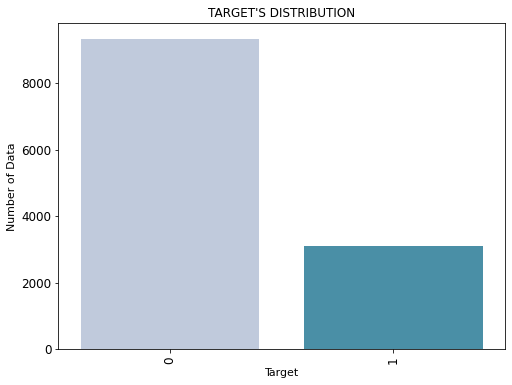

In [15]:
df['target'] = df['target'].astype('int')
print(df['target'].value_counts())
print('\n')
plt.figure(figsize=(8,6))
sns.countplot(x = 'target', data= df, palette = "PuBuGn", alpha= 0.9)
plt.ylabel('Number of Data', fontsize=11)
plt.xlabel('Target', fontsize=11)
plt.title("TARGET'S DISTRIBUTION", fontsize=12)
plt.xticks(rotation=90)
plt.show();

***Correlation:***

Per una maggiore efficienza in fase di modellazione, è necessario rimuovere le variabili correlate. Alcune delle caratteristiche, infatti, possono avere un’elevata correlazione e, pertanto, risultare in qualche modo ridondanti. In tali casi, le tecniche di riduzione delle dimensioni sono utili per comprimere le caratteristiche in un sottospazio dimensionale inferiore. Ciò comporta anche il vantaggio di richiedere meno spazio di memorizzazione e di accelerare il funzionamento dell’algoritmo di apprendimento.

> È possibile trovare le correlazioni, in questo caso tra la variabile target e il resto delle colonne, utilizzando la funzione ***corr***, per la quale di *default* sono esclusi i valori nulli. Graficamente, attraverso il ***pairplot*** e l'***heatmap***, propri della libreria *seaborn*, si comprende come non è possibile, in questo caso, rilevare alcun tipo di correlazione evidente. Nella matrice di correlazione le tonalità scure rappresentano una correlazione positiva mentre le tonalità più chiare rappresentano una correlazione negativa e, impostando il parametro *annot* a *True*, si ottengono i valori in base ai quali le caratteristiche sono correlate tra loro nelle celle della griglia.

In [16]:
df_corr = df.corr()['target'][:-1]
df_corr

City_development_index   -0.352236
Training_hours           -0.013660
Name: target, dtype: float64

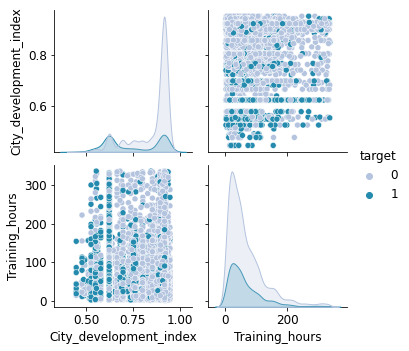

In [17]:
sns.pairplot(df, palette = 'PuBuGn', hue= 'target');

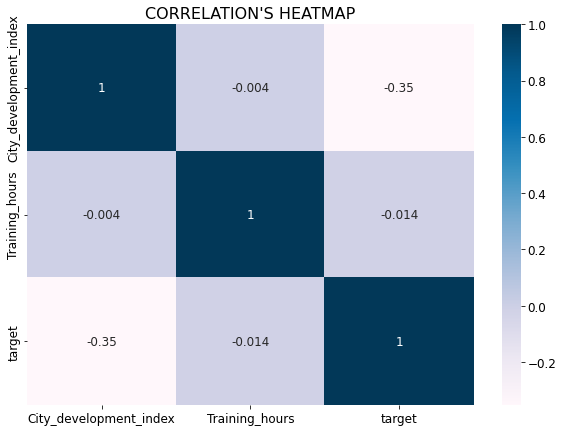

In [18]:
fig, ax= plt.subplots(figsize=(10,7))
ax=sns.heatmap(df.corr(), cmap="PuBu", annot=True);
plt.title("CORRELATION'S HEATMAP", fontsize=16);

***Data Visualization:***

Parte integrante dell'*EDA* è anche la visualizzazione delle verie features ricorrendo a grafici e *plot* specifici e di più semplice interpretazione.  



Considerata la presenza di molte variabili categoriche, è possibile analizzare eventuali trends attraverso la rappresentazione grafica delle stesse in relazione anche alla variabile *target*. 

> Il ***countplot*** è un grafico utilizzabile dalla libreria *seaborn* che mostra, attraverso le barre, i conteggi delle varie osservazioni. Dalla rappresentazione della feature *GENDER* si osserva una maggiore presenza maschile tra gli *employees*. 



Male      8595
Female     808
Other      132
Name: Gender, dtype: int64




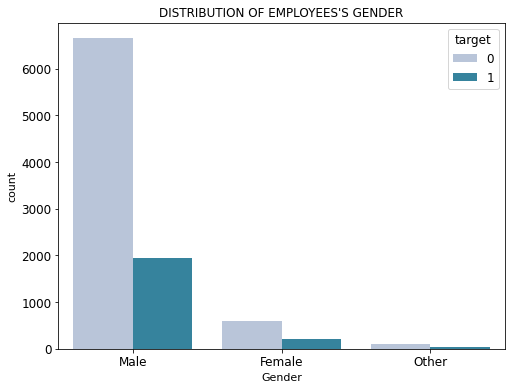

In [19]:
print(df['Gender'].value_counts())
print('\n')
plt.figure(figsize = (8,6))
sns.countplot(x = df['Gender'], data= df, hue = 'target', palette="PuBuGn")
plt.title("DISTRIBUTION OF EMPLOYEES'S GENDER", fontsize= 12);
plt.xlabel("Gender", fontsize= 11)
plt.ylabel("count", fontsize= 11)
plt.show();

In [20]:
Features = ["University_enrollment", "Relevent_experience", "Education_level", "Discipline", "Experience", "Last_job"]

for i in Features:
    fig= px.histogram(df, x=i, color="target", color_discrete_map={0: "lightblue", 1:  "lightslategray"}, 
                      barmode="group", title= "TARGET FOR {}".format(i))

    fig.show()

***Remarks:***

1. La **proporzione di uomini** che non cercano di cambiare lavoro supera in maniera rilevante la proporzione di uomini che cercano di cambiare lavoro. 
2. Nella tipologia di **corsi iscritti**, la maggior parte delle persone non sono registrate per i corsi e non sono disposte a cercare cambiamenti di lavoro.
2. La maggior parte dei **candidati con esperienza rilevante** non cerca un cambiamento di lavoro.
3. La maggior parte dei candidati che non cercano di cambiare lavoro ha un **grado di istruzione medio-alto**.  
5. La specializzazione del candidato è fondamentalmente **STEM**. Questo dimostra comunque che non si sta cambiando settore.
6. Nel gruppo che non cambia lavoro, molte persone hanno **più di 20 anni di esperienza lavorativa**. Da questo si potrebbe dedurre che più a lungo si lavora, più si auspica una maggiore stabilità. Al contrario, la minor esperienza lavorativa induce ad un tasso significativamente più alto di cambiamento di lavoro.
7. La **proporzione di posti di lavoro invariati** supera la proporzione di posti di lavoro cambiati. Inoltre, gli impiegati che sono appena entrati nell'azienda da circa un anno sono meno disposti a cambiare lavoro.

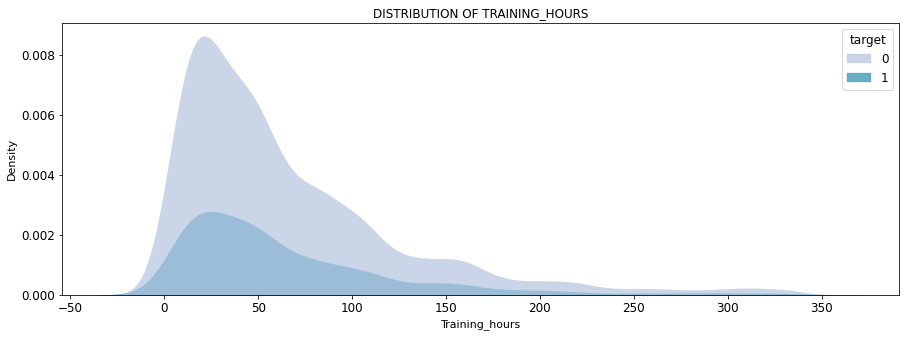

In [21]:
f, axes = plt.subplots(figsize = (15, 5));
sns.kdeplot(data = df, x = df["Training_hours"], hue = df["target"], palette="PuBuGn", alpha = 0.7, fill=True, linewidth=0.2); 
plt.title("DISTRIBUTION OF TRAINING_HOURS", fontsize= 12)
plt.xlabel("Training_hours", fontsize= 11); 
plt.ylabel("Density", fontsize= 11);

Per comprendere il comportamento della variabile *Training_hours* si è utilizzato un ***kdeplot***, proprio della libreria *seaborn*, attraverso il quale si tracciano le distribuzioni, in questo caso bivariate, utilizzando la stima della densità del *kernel*. 

> Una stima della densità del *kernel* (*KDE*) è un metodo per visualizzare la distribuzione delle osservazioni in un set di dati in maniera analoga ad un istogramma. *KDE* rappresenta i dati usando una curva di densità di probabilità continua in una o più dimensioni.

Dal grafico si osserva che, come prevedibile, la variabile non è distribuita normalmente, ma presenta un'asimmetria a destra.Inoltre entrambe le linee presentano quasi lo stesso trand. Da questo possiamo comprendere come la variabile non ha un grande impatto sulla ricerca del lavoro.

**Data Pre-processing**

Un concetto fondamentale da ricondurre alla fase di pre-processing è il cosiddetto ***“Garbage-in, garbage-out”***, per il quale molto spesso per rendere l'algoritmo più performance non bisogna concentrarsi sulla scelta dello stesso, ma sulla qualità dei dati che gli si danno in pasto. Ne deriva che un algoritmo molto forte con dati deboli, produrrà un output ugualmente debole. 
Questo è uno dei motivi per cui la fase di *pre-processing* ha assunto sempre più importanza.

> L'obiettivo è quello di convertire i dati grezzi in un set di dati puliti funzionali alla predispozione ed inizializzazione dell'algoritmo predittivo da utilizzare.






***Removing unusable columns:***


In prima istanza si eliminano le colenne ritenute ininfluenti ai fini dell'analisi. Nello specifico le colonne *Company_size* e *Company_type* presentano un elevato numero di valori mancanti e una bassa correlazione con la variabile target. *City* e *City_development_index* invece presentano un elevato numero di valori unici. L'output si ottiene per mezzo della funzione **drop** all'interno della quale si setta come parametro la colonna interessata. 

In [22]:
df = df.drop(['Company_size', 'Company_type', 'City','City_development_index' ], axis = 1)

Successivamenre si procede risolvendo le osservazioni rilevate precedentemente, correspettivamente per: 

*   ***Duplicates:***

> Essendo un numero limitato (44 elementi duplicati) e per questo non complessivamente impattante sull'intero dataset di dati, si procede all'eliminazione degli stessi attraverso la funzione **drop_duplicates**. Impostando il parametro *keep* a *False* si eliminano indistintamente tutti i duplicati. 

In [23]:
df.drop_duplicates(keep = False, inplace = True)
print(df.duplicated().value_counts())

False    11081
dtype: int64


*    ***NaN:***

> Il numero di valori mancanti, rispetto a quello dei duplicati, risulta maggiore e quindi non facilmente risolvibile con una eliminazione degli stessi. Conveniente in questi casi è sostituire il campo NaN con un altro metodo. 
La funzione **fillna** riempie i valori NA/NaN con la soluzione specificata come parametro. Nello specifico si è sostituito il valore mancante con *Unknown* e solo per la feature *Experience* il valore è settato a 0.
Con la funzione **isnull().sum()** si verifica la corretta risoluzione dei *missing data*. 

In [24]:
df["Gender"] = df["Gender"].fillna("Unknown")
df["Education_level"]= df["Education_level"].fillna("Unknown")
df["Discipline"].fillna(value="Unknown", inplace=True)
df["University_enrollment"] = df["University_enrollment"].fillna('Unknown')
df["Last_job"] = df["Last_job"].fillna('Unknown') 
df["Experience"] = df["Experience"].fillna(0)
missing_data_check = df.isnull().sum(axis=0)
missing_data_check

Gender                   0
Relevent_experience      0
University_enrollment    0
Education_level          0
Discipline               0
Experience               0
Last_job                 0
Training_hours           0
target                   0
dtype: int64

 *   ***Unbalance target:***

Come precedentemente rilevato la variabile *target* risulta sbilanciata nelle sue due componenti. In realtà la caratteristica dello sbilanciamento è riconducibile all'intero set di dati, impattando negativamente l'implementazione del modello predittivo. Il problema con lo sbilanciamento dei dati è che ci sono troppo pochi esempi della classe minoritaria affinché il modello di riferimento possa imparare efficacemente. Una soluzione per ovviare a tale problematica è quella di sovracampionare gli esempi della classe minoritaria.

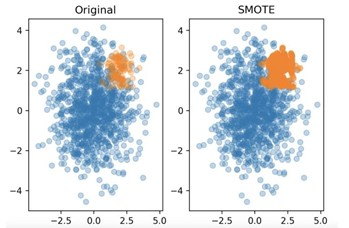
> Lo **SMOTE (Synthetic Minority Over-Sampling Technique)** infatti funziona selezionando esempi che sono vicini nello spazio delle caratteristiche. Si traccia una linea tra gli esempi nello spazio e si disegna un nuovo campione in un punto lungo quella linea. I nuovi esempi creati dalla classe di minoranza sono plausibili perchè relativamente vicini nello spazio delle caratteristiche agli esempi esistenti della classe di minoranza. 
Il parametro *random_state* controlla la randomizzazione dell'algoritmo ed il numero *int* rappresenta il generatore dei numeri casuali.

Per il momento ci si limita alla spiegazione e definizione della tecnica da utilizzare successivamente in fase di *split* dei dati. 


In [25]:
smote = SMOTE(random_state = 101)

*   ***Categorical variables:***

Uno dei maggiori problemi con l'apprendimento automatico deriva dall'impossibilità di molti algoritmi di lavorare direttamente con dati categorici. 

> I dati *categorici* sono variabili che assumono nomi o etichette come valori. Affinchè l'algoritmo di *ML* riesca a leggere tali variabili è necessario gestirle convertendole in valori numerici. 


> La tecnica maggiormente utilizzata per ovviare a tale problematica prende il nome di ***One-hot*** e consiste nella trasformazione della colonna categorica in colonne separate di 0 e 1 (una vettorizzazione binaria) a seconda che il valore corrisponda o meno all'intestazione della colonna.
Con tale codifica si sfruttano le informazioni contenute in un valore di categoria senza la confusione causata dall'ordinarietà. Il limite risiede nel fatto che si può riscontrare una certa ridondanza.

**N.B.** Questo è uno dei motivi per i quali è bene accertarsi che le variabili non presentino molte categorie di valori altrimenti la tabella "esploderebbe". 

Nella pratica, dopo aver identificato le variabili categoriche, attraverso la funzione ***select_dtypes***, si pone in essere un ciclo *for* nel quale si chiama il metodo **get_dummies**, con parametro *drop_first* settato a *False* per eseguire il metodo *one-hot*. 
Considerando che l'output non include le altre colonne, si aggiungono le nuove colonne create al dataframe esistente attraverso la funzione di *pandas* ***concat***. 
COn la funzione ***drop***, si eliminano le colonne di partenza.

In [26]:
cat_cols = df.select_dtypes(['object']).columns

for i in cat_cols:
    temp = pd.get_dummies(df[i], drop_first=False)
    df = pd.concat([df, temp], axis=1)
    df.drop(i, inplace=True, axis=1)

**Modeling**

***Supervised learning***

I problemi di *Machine Learning* si basano sullo sviluppo di modelli da utilizzare per prevedere vari esiti da nuovi dati forniti in input. E' possibile identificare tre differenti macrocategorie di problemi: *supervised learning*, *unsupervised learning* e *reinforcement learning*. 

Il ***supervised learning*** è il modello di apprendimento più utilizzato, che apprende da un insieme di dati etichettati con
le risposte corrette.                                           
La macchina deve stimare una **funzione f(x) incognita** (non conosciuta) che collega le variabili di input x a una variabile di output y.
Il suo scopo quindi è stimare una **funzione ipotesi h(x)** la cui accuratezza si valuta in base all'approssimazione della stessa alla funzione *f(x)*.

```
y = f(x)

y = h(x)
```
Il processo si compone di differenti fasi: 

1. *Variable declaration*
2. *SMOTE application*
3. *Data splitting*
4. *Standardization*
5. *Baseline Model*
6. *Model selection*
7. *Model evaluation*
8. *Hyperparameter tuning with cross-validation*

***Variable declaration***



Dal set di dati *df* si dichiarano la variabile ***X*** (l'insieme delle colonne di *df*, da cui si esclude, attraverso la funzione ***drop*** la variabile *target*) e la variabile ***y*** (la colonna *target* da predire). 

In [27]:
X = df.drop('target', axis = 1)
y = df['target']

***SMOTE application***

Come precedentemente esposto nella fase di *pre-processing*, si utilizza lo *SMOTE* per ottemperare alla problematica dello sbilanciamento dei dati. 
Si definiscono le variabili ***X_smote*** e ***y_smote*** sulle quali, dopo aver applicato il sovracampionamento, si esegue il ***fit_resample*** ovvero il ricampionamento del dataset, ritornando rispettivamente per la X una matrice contenente i dati ricampionati, per la y l'etichetta corrispondente della y_smote. 

***N.B.*** E' necessario convertire le variabili, passate come parametri del *fit_resample*, in un *NumPy array* attraverso la funzione ***to_numpy()***. 

In [28]:
X_smote, y_smote = smote.fit_resample(X.to_numpy(), y.to_numpy())

***Data splitting***

Per confermare se l’algoritmo di apprendimento si comporta efficacemente non solo sul dataset di addestramento ma anche su nuovi dati, si suddivide il dataset in 2 nuovi *set*: utilizzando il set di *training*/addestramento per informare ed ottimizzare il modello di apprendimento automatico, mentre il set di *test* per valutare il modello.
Lo *split* si esegue chiamando la funzione ***train_test_split*** che, partendo dai parametri di input precentemente ottenuti, ritorna i campi X_train e Y_train da utilizzare per preparare i modelli e i campi X_test e y_test da utilizzare successivamente. 

***N.B.*** Alla funzione sono passati i parametri *test_size*, che, se è uguale a un *int*, rappresenta il numero assoluto di campioni di prova, e *random_state* che controlla il rimescolamento random applicato ai dati prima di applicare lo split. 

In [29]:
X_train_, X_test_, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.20, random_state=29)
print(X_train_.shape)
print(y_train.shape)
print(X_test_.shape)
print(y_test.shape)

(12950, 54)
(12950,)
(3238, 54)
(3238,)


***Z-score normalization***

Per garantire prestazioni ottimali, molti algoritmi di *Machine learning* e di ottimizzazione richiedono anche una riduzione di scala, affinché le *features* che si comparano non presentino valori con unità o scale differenti. 

> Per **standardizzazione** (*Z-score normalization* o *standardization*) si fa riferimento ad un procedimento statistico di manipolazione dei dati che modifica i valori di una o più *features* affinché abbiano le proprietà di una distribuzione Gaussiana con μ=0 e σ=1 (media zero e deviazione stardard uno). 
In questo modo la colonna della caratteristica assume la forma di una **distribuzione normale**, dalla quale è più facile per gli algoritmi di ML derivare i pesi. 


```
z = x - μ / σ
```

> Riferita ad una variabile casuale, la **deviazione standard** indica la dispersione attorno ad un indice di posizione quale ad esempio la **media aritmetica**.

> Una **distribuzione Gaussiana**, o normale, è una particolare distribuzione associata alle variabili casuali.

***N.B.*** Inoltre, la standardizzazione mantiene informazioni utili riguardo alle anomalie e rende l’algoritmo meno sensibile a questo problema. 

In questo caso, si standardizzano la variabile X utilizzando la classe ***StandardScaler*** del modulo *preprocessing* di *scikit-learn*.
Con il ***metodo fit***, lo *StandardScaler* stima i parametri (media del campione e deviazione standard) per ciascuna dimensione delle caratteristiche presenti nei dati di addestramento. Richiamando il ***metodo transform*** si standardizzano i dati di addestramento utilizzando i parametri stimati.

***N.B.*** Ci sono algoritmi che apprezzano la standardizzazione delle features, come il **K-nearest neighbors** con misura della distanza euclidea e la **Logistic Regression** ed algoritmi per i quali, al contrario, pur riscontrando miglioramenti nella *performance*, non è possibile considerare una stretta relazione al loro funzionamento (*Naive Bayes, Decisiom Trees, Random Forest*). 

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_)
X_test = sc.transform(X_test_)

***Baseline Model***

Si tratta di un modello molto semplice che   fornisce risultati ragionevoli e non richiede molta esperienza o tempo (anche computazionale) per essere eseguito.
Essendo un punto di partenza molto semplice, una **baseline** non è perfetta. 

> Le *baseline* tipiche sono quelle supportate dagli stimatori ***'dummy'*** di *scikit-learn*. Esse ritornano previsioni che ignorano le caratteristiche di *input*. 
Infatti, il classificatore serve come una semplice *linea di base* da confrontare con altri classificatori più complessi.

In questo caso, il comportamento specifico della *baseline* chiamata è selezionato settando il parametro *strategy* a *'most_frequent'* per il quale si predice sempre l'etichetta più frequente nel set di allenamento.


In [31]:
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_model.predict(X_test)
baseline_model.score(X_test, y_test)

0.49845583693638046

***Model selection***

Si tratta del **processo di scelta** tra i diversi algoritmi di apprendimento per modellare i dati. 
Gli algoritmi scelti e che si analizzeranno sono distinguibili in: 
1. *Logistic Regression*
2. *K-nearst neighbors (Knn)*
3. *Random Forest Classifier*

> In questa fase si procederà per ognuno, dapprima, a chiamare il metodo di riferimento attraverso la libreria *sklearn*, successivamente ad allenarlo (***fit***), dandogli in pasto i dati di addestramento (***X_train***, ***y_train***) ed infine ad istanziare le predizioni attraverso la funzione ***predict*** che accetta solo un singolo argomento, nello specifio il dato da testare.




***Logistic Regression***
> E' il modello di classificazione tra i più utilizzati per la classificazione binaria, volto a calcolare la probabilità che una determinata istanza appartenga ad una specifica classe.

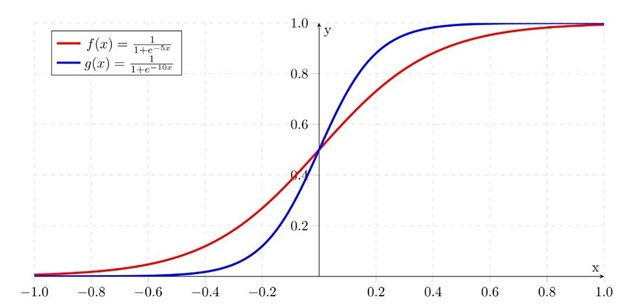

Come un modello di regressione lineare (*Linear Regression*), quello di regressione logistica calcola la somma pesata (*weighted sum*) delle *features*, con l’aggiunta di un termine denominato *bias*, ma il risultato è processato da una **funzione logistica** invece di essere restituito direttamente.

 L’elemento di base, infatti, è il **rapporto probabilistico**, ovvero le probabilità favorevoli relative ad un determinato evento, che può essere scritto come:
```
logit(p) = ln (p / 1 - p) 
```
*p* = probabilità dell’evento positivo |
*funzione logit* = logaritmo del rapporto probabilistico 

***N.B.*** Il termine **evento positivo** non significa necessariamente buono, ma fa riferimento all’evento da prevedere. 

***N.B.*** La **funzione logistica** è un caso particolare, appartenente a una classe di funzioni chiamati **sigmoidi**.
(particolari funzioni con un andamento a ‘S’). 

*Vantaggi*: è un modello semplice che può essere aggiornato con facilità. 



In [32]:
model1 = LogisticRegression(max_iter= 500)
model1.fit(X_train, y_train.ravel())
predictions = model1.predict(X_test)

***K-nearst neighbors (Knn)***
> Modello predittivo basato sui *'punti vicini'*. Si parte da alcuni punti di dati e un corrispondente insieme di etichette, ossia di **classi**. 

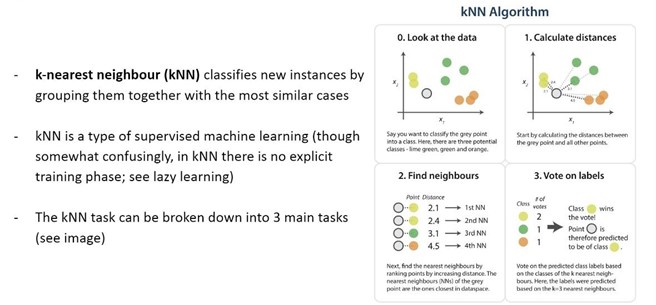

***N.B.*** Le etichette sono variabili booleane, vero/falso o categorie. I punti di dati sono dei vettori su cui si può utilizzare la funzione *'distance'*. 

Si necessita di: 
- una qualche misura di distanza
- l'assunzione che punti fra loro vicini siano simili

*Vantaggi:* tra i modelli predittivi più semplici in quanto non ci sono ipotesi matematiche e non richiede meccanismi complessi. 



In [33]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train.ravel())
predictions2 = model2.predict(X_test)

***Random Forest Classifier***
> Per evitare l'iperadattamento ai dati di addestramento, si utilizza una tecnica chiamata Random Forest (foreste casuali), con cui si costruiscono molti alberi di decisionea partire sempre dallo stesso training set, scegliendo però lo split ottimale in un sottoinsieme casuale degli split possibili. 
In questo modo ogni albero risulta diverso.

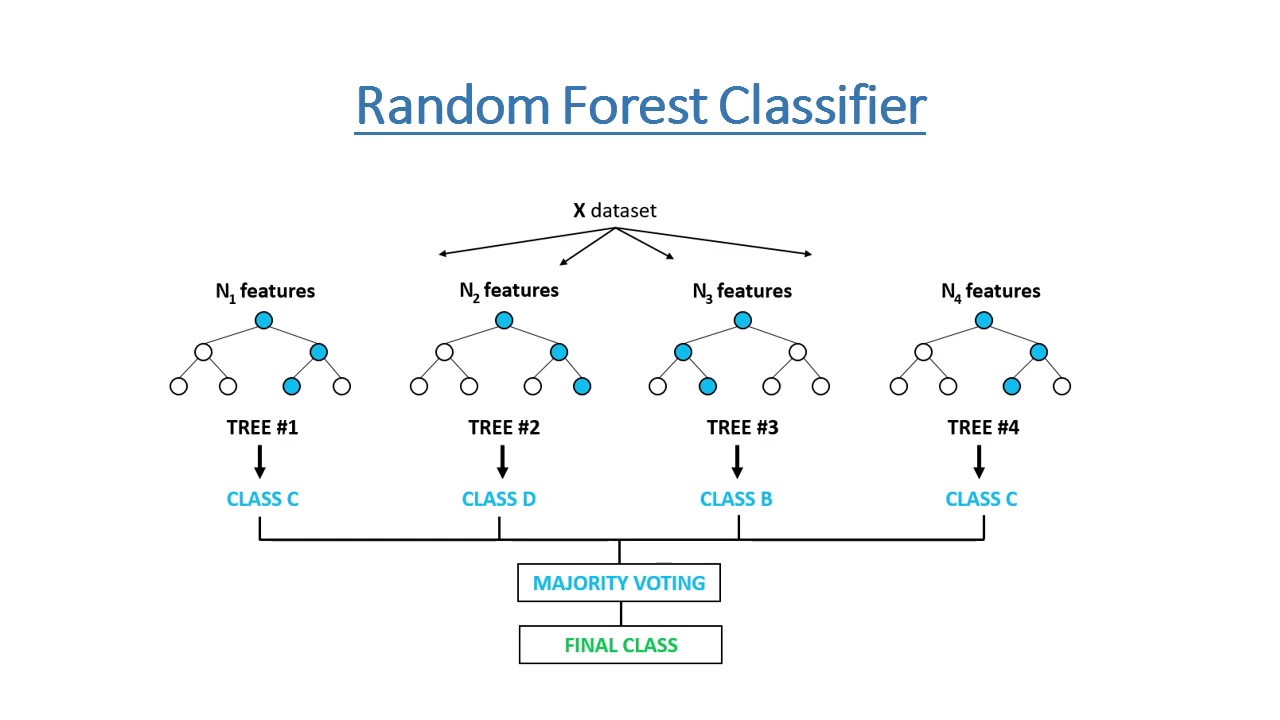

***N.B.*** Si tratta di un gruppo di **Decision Tree** messi insieme per raggiungere migliori performance di classificazione.
> Un *Decision Tree* da solo, infatti, tende a soffrire di **alta varianza** (e quindi tendenza all’overfitting). Mettendo insieme più *Decision Tree* è possibile fare una media che risulta in un modello più robusto con migliori capacità di generalizzazione.

***N.B.*** L’unico parametro di cui dobbiamo davvero preoccuparci, in pratica, è il **numero di alberi k** che si sceglie per la foresta casuale. Tipicamente: maggiore è il numero di alberi, migliori saranno le prestazioni del classificatore a foresta casuale, con lo svantaggio di un incremento del costo computazionale. Una volta ottenuta la foresta casuale si eseguono le predizioni di ogni singolo albero decisionale che compone la foresta, utilizzando una 
metrica specifica, come: 
- ***Gini Impurity*** (metrica di default, rappresenta quanto pura è la variabile target nel dataset) 
- ***Entropia*** (rappresenta il disordine delle variabili)


*Vantaggi:* Le foreste casuali hanno acquisito grande popolarità nelle applicazioni di machine learning durante l’ultimo decennio grazie alle loro buone prestazioni di classificazione, alla loro scalabilità e alla loro facilità d’uso.



In [34]:
model3 = RandomForestClassifier (n_estimators=100)
model3.fit(X_train, y_train.ravel())
predictions3 = model3.predict(X_test)

***Model evaluation***

Si fa riferimento al **processo di controllo** delle prestazioni del modello per vedere quanto il modello di riferimento è in grado di spiegare i dati. 

Le metriche di valutazione utilizzate per ognuno degli algoritmi sono distinguibili in: 
1. ***Accuracy***
- Il termine accuratezza fa riferimento alla precisione di previsione. È il **rapporto** tra il numero di previsioni corrette e il numero totale di campioni di input.

```
Classification accuracy = ⴄ = Nc / N t 
```
Nt= numero di testing examples | Nc = Numero di testing examples classificati come corretti 

2. ***Confusion matrix***
- Come il nome stesso rimanda, fornisce una matrice come output e descrive le prestazioni complete del modello. 
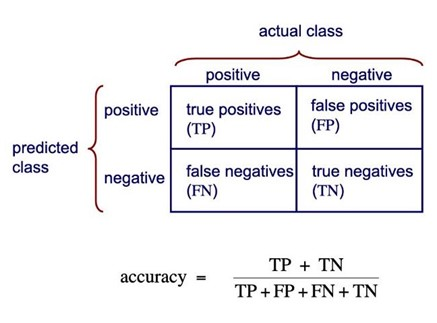

3. ***Classification report***
Si tratta di una funzione che produce una reportistica molto dettagliata, in quanto in una sola schermata visualizza per ogni classe: 
- **precision**: quanto accurate sono le previsioni positive (vero positivo / (vero positivo + falso positivo)) 
- **recall**: quanta parte di positivi il modello ha
identificato correttamente (vero positivo / (vero positivo + falso negativo))
- **f1-score**: media armonica di precisione e richiamo 

4. ***Curva roc*** (area sotto la curva roc) 
- L'Area Under Curve (AUC) è una delle metriche più utilizzate per la valutazione, soprattutto per problemi di classificazione binaria. L'**AUC** di un classificatore è uguale alla probabilità che il classificatore classifichi un esempio positivo scelto a caso più in alto di un esempio negativo scelto a caso. Più nello specifico, mostra il compromesso tra il tasso di veri positivi (TPR) e il tasso di falsi positivi (FPR), calcolati per soglie diverse. 
***N.B.*** Ha un range di [0, 1], quindi maggiore è il valore, migliori sono le prestazioni del modello.

LOGISTIC REGRESSION


The accuracy of Logistic Regression is 81.01 %


              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1614
           1       0.95      0.65      0.78      1624

    accuracy                           0.81      3238
   macro avg       0.84      0.81      0.81      3238
weighted avg       0.84      0.81      0.81      3238



The area under the roc curve is 0.8105497005878367


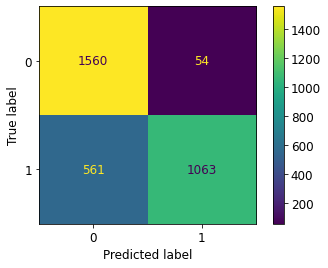

In [35]:
confusion1 = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion1, display_labels=model1.classes_)
disp.plot()

print("Logistic Regression".upper())
print('\n')
accuracy1 = round(model1.score(X_test, y_test) *100, 2)
print("The accuracy of Logistic Regression is {} %".format(accuracy1))
print('\n')
print(classification_report(y_test, predictions))
print('\n')

curve_1 = fpr, tpr, thresholds  = roc_curve(y_test, predictions)
area1 = auc(fpr, tpr)
print("The area under the roc curve is {}".format(area1))

K-NEIGHBORS CLASSIFIER


The accuracy of kNN is 76.96 %


              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1614
           1       0.82      0.70      0.75      1624

    accuracy                           0.77      3238
   macro avg       0.78      0.77      0.77      3238
weighted avg       0.78      0.77      0.77      3238



The area under the roc curve is 0.7698375818728979


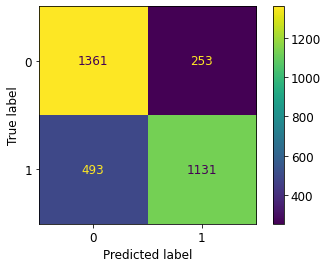

In [36]:
confusion2 = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion2, display_labels=model2.classes_)
disp.plot()

print("K-Neighbors Classifier".upper())
print('\n')
accuracy2 = round(model2.score(X_test, y_test) *100, 2)
print("The accuracy of kNN is {} %".format(accuracy2))
print('\n')
print(classification_report(y_test, predictions2))
print('\n')

curve_2 = fpr, tpr, thresholds  = roc_curve(y_test, predictions2)
area2 = auc(fpr, tpr)
print("The area under the roc curve is {}".format(area2))

RANDOM FOREST CLASSIFIER


The accuracy of Random Forest is 75.82 %


              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1614
           1       0.77      0.74      0.75      1624

    accuracy                           0.76      3238
   macro avg       0.76      0.76      0.76      3238
weighted avg       0.76      0.76      0.76      3238



The area under the roc curve is 0.7582361235739008


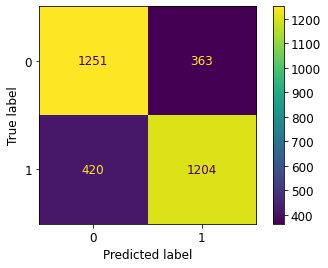

In [37]:
confusion3 = confusion_matrix(y_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion3, display_labels=model3.classes_)
disp.plot()

print("Random Forest Classifier".upper())
print('\n')
accuracy3 = round(model3.score(X_test, y_test) *100, 2)
print("The accuracy of Random Forest is {} %".format(accuracy3))
print('\n')
print(classification_report(y_test, predictions3))
print('\n')

curve_3 = fpr, tpr, thresholds  = roc_curve(y_test, predictions3)
area3 = auc(fpr, tpr)
print("The area under the roc curve is {}".format(area3))

***Cross-validation strategy***

***L'overfitting*** è una considerazione chiave quando si guarda alla qualità di un modello, in quanto si verifica quando si ha un'ipotesi che si comporta significativamente meglio sui suoi esempi di dati di addestramento rispetto agli esempi di dati di test. Questo è un concetto estremamente importante nell'apprendimento automatico, perché è una delle caratteristiche principali da evitare. 
- Affinché un modello di apprendimento automatico sia robusto ed efficace deve essere in grado di prevedere bene i dati non visti, deve essere in grado di generalizzare. 

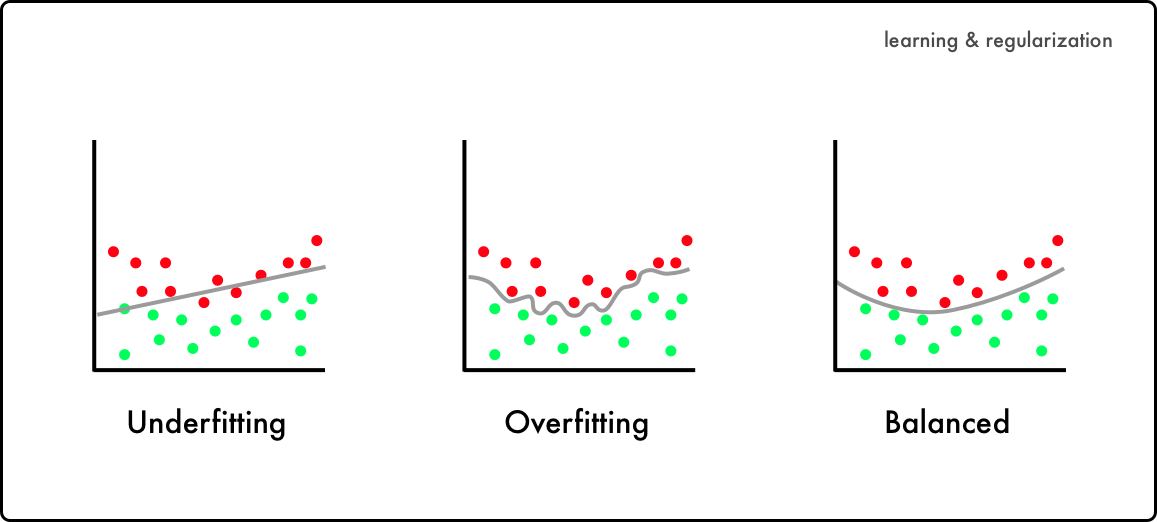

> La ***cross-validation***, a volte chiamata stima di rotazione o test fuori campione, è una delle varie tecniche di convalida di modelli simili per valutare come i risultati di un'analisi statistica si generalizzera a un insieme di dati indipendenti. 

È un metodo particolarmente utile per i set di dati più piccoli. Si esegue il processo di modellazione su diversi sottoinsiemi di dati, chiamati ***split***, per ottenere misure multiple della qualità del modello. 

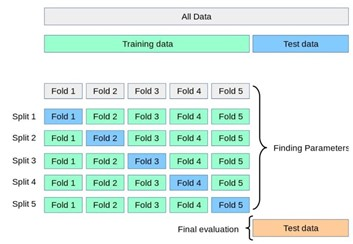

***N.B.*** Si divide il dataset in k blocchi di uguale dimensione ed ogni blocco è usato sia per il test che per il training almeno una volta. 

***Obiettivo:*** trovare l’insieme di parametri che permette di avere il modello nella sua migliore performance (combinazione di parametri più efficiente possibile).

In [38]:
cv_model1 = cross_val_score(model1, X_train, y_train.ravel(), cv=10)
print("Cross Validation _ Logistic Regression".upper())
print('\n')
print(cv_model1)

one = np.mean(cv_model1)
print('\n')
print("The mean is {}".format(one*100))

CROSS VALIDATION _ LOGISTIC REGRESSION


[0.80849421 0.81158301 0.82393822 0.82857143 0.7984556  0.8007722
 0.81235521 0.81544402 0.82779923 0.82548263]


The mean is 81.52895752895753


In [39]:
cv_model2 = cross_val_score(model2, X_train, y_train.ravel(), cv= 10) 
print("Cross Validation _ kNN".upper())
print('\n')
print(cv_model2) 

two = np.mean(cv_model2)
print('\n')
print("The mean is {}".format(two*100))


CROSS VALIDATION _ KNN


[0.75057915 0.75289575 0.77297297 0.78687259 0.75444015 0.77065637
 0.76756757 0.78301158 0.78146718 0.77297297]


The mean is 76.93436293436294


In [40]:
cv_model3 = cross_val_score(model3, X_train, y_train.ravel(), cv= 10) 
print("Cross Validation _ Random Forest Classifier".upper())
print('\n')
print(cv_model3) 

three = np.mean(cv_model3)
print('\n')
print("The mean is {}".format(three*100))

CROSS VALIDATION _ RANDOM FOREST CLASSIFIER


[0.77915058 0.74671815 0.77837838 0.76447876 0.74362934 0.77220077
 0.75752896 0.76602317 0.76679537 0.76525097]


The mean is 76.40154440154441


***Model result***

Dalle metriche di valutazione e dalla cross validation è possibile constatare come il ***Logistic Regression*** risulta essere il modello con i valori più performanti. I grafici successivi mostrano visivamente i risultati ottenuti. 

In [41]:
model_list = ["LogisticRegression", "kNN", "RandomForest"]
accuracy_list = [accuracy1, accuracy2, accuracy3]

ACCURACY


LogisticRegression    81.01
kNN                   76.96
RandomForest          75.82
dtype: float64




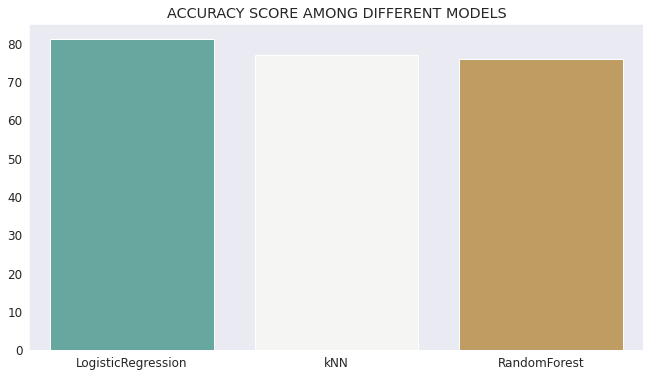

In [42]:
accuracy_models = pd.Series(data= accuracy_list, index=model_list)
print("Accuracy".upper())
print('\n')
print(accuracy_models)
print('\n')

plt.figure(figsize=(11,6));
sns.set_style('dark');
accuracy_plot= sns.barplot(x= model_list, y= accuracy_list, palette= ("BrBG_r"))
plt.title("Accuracy score among different models".upper());

CROSS VALIDATION


LogisticRegression    81.528958
kNN                   76.934363
RandomForest          76.401544
dtype: float64




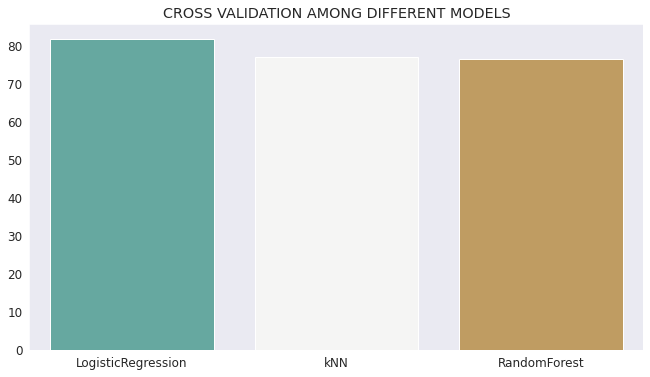

In [43]:
cv_list = [one*100, two*100, three*100]

cv_models= pd.Series(data=cv_list, index= model_list)
print("Cross Validation".upper())
print('\n')
print(cv_models)
print('\n')

plt.figure(figsize=(11,6));
sns.set_style('dark');

accuracy_plot= sns.barplot(x= model_list, y= cv_list, palette= ("BrBG_r"))
plt.title("Cross Validation among different models".upper());


***Nested Cross-Validation***

Successivamente all'identificazione del modello più performante, si prosegue valutando per lo stesso **la Nested Cross-Validation**. 

>  L'obiettivo ultimo è quello di ricercare il valore ottimale dell'iperparametro del modello per controllare la complessità dello stesso in modo che non vada in *overfit*. 

***N.B.*** I **parametri** sono i valori che un modello deve imparare per fare previsioni. 
- Es: nel caso della regressione, sono i coefficienti delle variabili da imparare. Questi valori sono chiamati parametri.

***N.B.*** L'**iperparametro** è diverso. 
- Es: per i modelli di regressione, il numero di variabili è l'iperparametro di cui si deve trovare il valore ottimale.

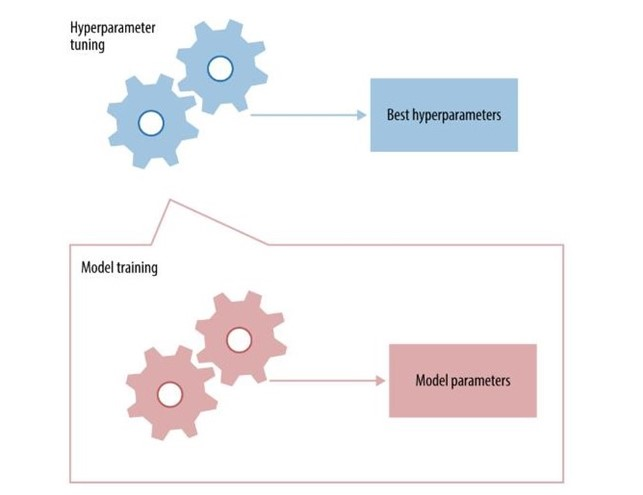




Quindi al fine di superare la distorsione nella valutazione delle prestazioni, è opportuno considerare la selezione del modello come parte integrante della procedura di adattamento del modello. 

La procedura comporta: 
- il **trattamento dell'ottimizzazione degli iperparametri** del modello come parte del modello stesso
- la valutazione all'interno della più ampia procedura di convalida incrociata di k-fold per la **valutazione dei modelli**per il confronto e la selezione 

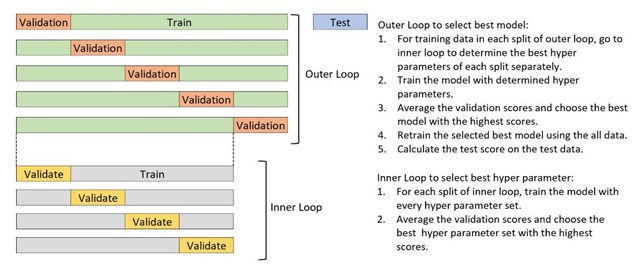

***N.B.*** La **procedura di convalida incrociata k-fold** per l'ottimizzazione degli iperparametri del modello è annidata all'interno della procedura di convalida incrociata k-fold per la selezione del modello. L'uso di due cicli di convalida incrociata porta anche la procedura ad essere chiamata **"doppia convalida incrociata"**.
Si fa riferimento a due loop: 
1. **Loop interno**
2. **Loop esterno** 

La ricerca degli iperparametri non ha l'opportunità di sovrafittare il set di dati in quanto è esposta solo a un sottoinsieme del set di dati fornito dalla **procedura di validazione incrociata esterna**. Questo riduce, se non elimina, il rischio che la procedura di ricerca si adatti eccessivamente al dataset originale e dovrebbe fornire una stima meno distorta delle prestazioni di un modello sintonizzato sul dataset.

**N.B.** Tipicamente, la procedura di convalida incrociata k-fold comporta l'adattamento di un modello su tutti i fold tranne uno e la valutazione del modello adatto sul fold di holdout. Ogni set di dati di addestramento viene poi fornito a una procedura di ottimizzazione degli iperparametri, come la ricerca a griglia o la ricerca casuale, che trova un set ottimale di iperparametri per il modello. La valutazione di ogni set di iperparametri viene eseguita utilizzando k-fold cross-validation che suddivide il dataset di allenamento fornito in k pieghe, non il dataset originale.

La ***libreria scikit-learn*** fornisce l'ottimizzazione degli iperparametri di ricerca casuale e di ricerca a griglia tramite la classe ***GridSearchCV***. 
- La procedura viene configurata creando la classe e specificando il modello, il set di dati, gli iperparametri da cercare e la procedura di convalida incrociata.

***N.B.*** Queste classi possono essere utilizzate per il ciclo interno (inner loop)  della convalida incrociata annidata in cui il set di dat è definito anche dal ciclo esterno (outer loop). 

È importante la ricerca degli iperparametri perchè si ha la possibilità di riadattare un modello finale con l'intero dataset di allenamento usando i migliori iperparametri trovati durante la ricerca. 
- Questo può essere ottenuto recuperando il modello tramite l'attributo **"'best_estimator_'** sul risultato della ricerca.

In [44]:
cv_model1 = cross_val_score(model1, X_train, y_train, cv=8)
print(cv_model1)

p_grid = {
    "C": [1, 10, 0.1], 
    "solver": ['newton-cg', 'lbfgs', 'liblinear'], 
    "penalty": ['l2']
}

inner_cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 40)
outer_cv = StratifiedKFold(n_splits = 4, shuffle= True, random_state= 41)

clf = GridSearchCV(estimator= model1, param_grid= p_grid, cv= inner_cv)
nested_score= cross_val_score(clf, X= X_train, y= y_train, cv = outer_cv)
score_model1 = nested_score.mean()

print("The performance score is {}".format(score_model1))
print('\n')

grid_model1 = clf.fit(X_train, y_train)
print("The best estimator is {}".format(grid_model1.best_estimator_))
print('\n')
print("The best parameter is {}".format(grid_model1.best_params_))

[0.80605312 0.81284744 0.83075973 0.80605312 0.80790611 0.80420012
 0.82571075 0.82756489]
The performance score is 0.8143629060834014


The best estimator is LogisticRegression(C=10, max_iter=500, solver='newton-cg')


The best parameter is {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


***Conclusion***

Il modello che si è scelto è il **Logistic Regression** in quanto risulta più performante sia in sede di metriche di valutazione, come **l'accuracy**, sia in sede di esecuzione del modello con la strategia della **cross-validation**. 
A seguito della stima dei migliori **iperparametri** dello stesso si è constatato come a risultare più efficienti sono i seguenti: 
- C = 10

**N.B**: è l'Inverso della forza di regolarizzazione: 
deve essere un float positivo. Come nelle macchine vettoriali di supporto, valori più piccoli specificano una regolarizzazione più forte.

- Penalty = 12

**N.B** Indica la norm del penalty. L2 aggiungere un termine di penalità L2 ed è la scelta predefinita (default). 

- Solver = newton-cg 

**N.B** Il valore predefinito è 'lbfgs'. Per piccoli insiemi di dati, 'liblinear' è una buona scelta, mentre 'sag' e 'saga' sono più veloci per quelli grandi. 






I problemi di *Machine Learning* sono problemi sempre complessi e nuovi, per i quali molto spesso a valutarne la buona riuscita non è tanto la scelta dell'algoritmo di selezione, quanto la qualità con cui lo stesso ottiene ed è in grado di leggere i dati. La **sfida principale**, personalmente, è proprio la pulizia dei dati e l'estrapolazione dagli stessi delle maggiori informazioni in grado di incalanarli verso la giusta predisposizione della fase di *modeling*. 

Da questo ne consegue l'invito ad utilizzare differenti tecniche in fase di *pre-processing*, per migliorare gli *score* ottenuti. 
Si è tentato di riscrivere il Notebook in una forma, a mio parere, più immediata ed *'elegante'* attraverso il metodo della **Pipeline**. 

**Pipeline**

Il **principio cardine** alla base dell’analisi dati è che quando si valuta la performance del modello si deve utilizzare un test dataset **mai visto** dal modello. Si assiste ad una violazione del principio nel momento in cui nella fase di pre-processing si eseguono le varie funzioni su tutto il dataset caricato. 

**Soluzione**: la fase di pre-processing deve essere inserita all'interno della stessa fase di modeling, per cui prima si splitta il dataset e poi solo con il training si esegue la fase di pre-processing. 

> È un insieme di trasformatori con un estimatore finale. 

**N.B.** La Pipeline in modo sequenziale esegue i trasformatori come una catena: il primo input è il dato, il quale viene dato in pasto al primo transformer, l'output del primo transformer è dato in pasto al secondo transformer e così via. 

***Obiettivo:*** assemblare i diversi step, per poter essere poi *fittati* e *validati* in maniera congiunta. 







- A titolo esemplificativo si è fornito un Notebook con un esempio di impostazione del modello Logistic Regression come estimatore finale della Pipeline composta da SMOTE, StandardScaler e PCA (in sede di *features selection*). 
[Pipe_Notebook](https://colab.research.google.com/drive/1R0_sYcXeXY8etASa0ZgCRfO3RsW6koya#scrollTo=sjQTsRw_CMHu)